# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The standard deviation is very large and is not particularly helpful; that said, the data is right skewed and therefore the mean and std are not a good representation of the data. Median would be more helpful in this case. 

<AxesSubplot:>

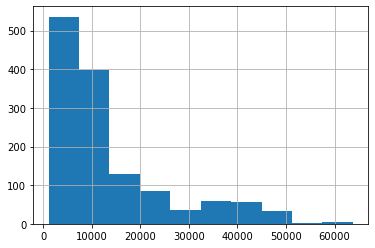

In [4]:
medical.charges.hist()

In [5]:
print("Mean:", medical.charges.mean())
print("Std:", medical.charges.std())
print("Median:", medical.charges.median())

Mean: 13270.422265141257
Std: 12110.011236693994
Median: 9382.033


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The distribution is not normal, as seen in the histogram above. As such, the mean and standard deviation are not helpful summary statistics. 

Since the primary statistic of concern is the average charge, we can look at the data as an aggragate. Thus we can look at the problem as: what is the average charge for a given number of patients? In this case, the number of patients scales. The CLT tells us that we can expect the charges to approach a normal distribution (bell curve) with the mean and standard deviation, where they are the population mean and standard deviation. We do not know these true parameters, but we do know how to estimate them from our samples since it is a randomly selected sample. 

The most appropriate frequentist test would be to calculate the 95% confidence interval for the mean using the t distribution, since we have a random sample of the true population. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ a one sided interval makes more sense since we are trying to find in favor of lower charges specifically rather than than both directions - we want to know if it is lower than 12,000, and do not care if it goes above (that would simply be a bonus).

In [50]:
n = len(medical.charges) # number of samples (charges) 
pop_mean_est = np.mean(medical.charges) # estimated mean
pop_std_est = np.std(medical.charges, ddof=1) # estimated standard deviation, ddof=1 -> divisor is n-ddof
n, pop_mean_est, pop_std_est

(1338, 13270.422265141257, 12110.011236693994)

In [19]:
'''
This is the multiplier for how many standard deviations from the mean. 
For a 95% confidence interval, we are finding the lower bound 2.5% (0.025)
The df argument is degrees of freedom, 
which is usually the sample size minus 1 for a single population sampling problem
'''

t_crit = t.ppf(.025, df=n-1)
t_crit

-1.9617398886008455

In [56]:
#Here's the equation for the 2.5% bound of the confidence interval
lower_limit = pop_mean_est + t_crit * pop_std_est / np.sqrt(n)
lower_limit

12620.954034192644

The lower limit within the 95% confidence interval is 12,620.95, so the admin doesn't need to be worried - we can reasonably assume that the mean charge is not below 12,000. 

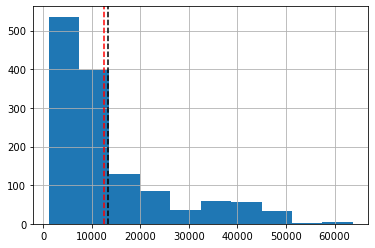

In [89]:
medical.charges.hist()
_ = plt.axvline(lower_limit, color='r', linestyle='--')
_ = plt.axvline(pop_mean_est, color='black', linestyle='--')

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is "Those without insurance are charged the same (not charged differently) than those with insurance" and the alternative hypothesis is "Those without insurance are not charged the same (charged differently) than those with insurance".

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [137]:
# quick examination
mean_insured = np.mean(medical[medical.insuranceclaim ==1].charges)
mean_uninsured = np.mean(medical[medical.insuranceclaim ==0].charges)

std_insured = np.std(medical[medical.insuranceclaim ==1].charges, ddof=1)
std_uninsured = np.std(medical[medical.insuranceclaim ==0].charges, ddof=1)

n_insured = len(medical[medical.insuranceclaim ==1].charges)
n_uninsured = len(medical[medical.insuranceclaim ==0].charges)

print(n_insured, mean_insured, std_insured)
print(n_uninsured, mean_uninsured, std_uninsured)

783 16423.928276537663 14045.928418802127
555 8821.421892306294 6446.510126811736


In [138]:
numerator = ((n_uninsured - 1) * (std_uninsured**2) + (n_insured - 1) * (std_insured**2))
denominator = (n_uninsured + n_insured - 2) #AKA new DF 
pooled_std = np.sqrt(numerator / denominator)
pooled_std

11520.034268775256

In [139]:
t_numerator = mean_uninsured - mean_insured
t_denominator = pooled_std * np.sqrt((1/n_uninsured)+(1/n_insured))
t_test_statistic = t_numerator / t_denominator
t_test_statistic

-11.89329903087671

In [140]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
print(ttest_ind(medical[medical.insuranceclaim == 0].charges, medical[medical.insuranceclaim == 1].charges))
ttest_ind_from_stats(mean_uninsured, std_uninsured, n_uninsured, mean_insured, std_insured, n_insured)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)


Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I do not see anything for a z-test.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test